Get API KEY from `.env`

In [40]:
import os, requests, certifi
from dotenv import load_dotenv
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from openai import OpenAI
from pathlib import Path
from IPython.display import Image, display

os.makedirs("images", exist_ok=True)

load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
if not OPENAI_API_KEY: raise ValueError('API not found')
client = OpenAI(api_key=OPENAI_API_KEY)

Calling from the python API - Added

Image saved as images/a_realistic_human_surfing_in_a_competition_with_a_shark_above_him.png


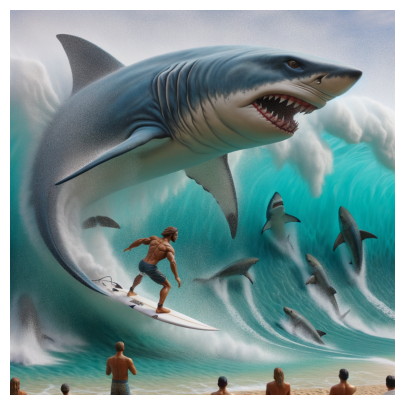

In [39]:

def display_image(image_path, figsize=(5, 5)):
    # Read image
    img = mpimg.imread(image_path)
    
    # Create figure with specified size
    plt.figure(figsize=figsize)
    
    # Remove axes
    plt.axis('off')
    
    # Display image
    plt.imshow(img)
    plt.show()
    

def generate_and_display_image(prompt):
    """
    Generate an image using DALL-E API and display it in the notebook
    """
    # Create config dictionary
    filename = 'images/' + '_'.join(prompt.split(' ')).lower()
    config = {
        "api_key": OPENAI_API_KEY,
        "filename": filename,
        "payload": {
            "prompt": prompt,
            "n": 1,
            "size": "1024x1024",
            "quality": "hd",
        }
    }
    
    try:

        # Generate image using DALL-E
        response = client.images.generate(
            model="dall-e-3",
            **config['payload']
        )
        
        # Get image URL from response
        image_url = response.data[0].url
        
        # Create images directory if it doesn't exist
        Path("images").mkdir(exist_ok=True)
        
        # Download and save the image
        image_filename = f"{config['filename']}.png"
        image_response = requests.get(image_url)
        image_response.raise_for_status()
        
        with open(image_filename, 'wb') as img_file:
            img_file.write(image_response.content)
        print(f"Image saved as {image_filename}")
        
        # # Display the image in notebook
        # display(Image(image_filename))
        
        display_image(image_filename)
        
        return image_filename
        
    except Exception as e:
        print(f"Error generating image: {str(e)}")
        return None

# Example usage
prompt = "A realistic human surfing in a competition with a shark above him"
generated_image = generate_and_display_image(prompt)

Presented in the course - Calling DALL-E form the API endpoint.

Image saved as images/a_realistic_human_surfing_in_a_competition_with_a_shark_above_him1.png


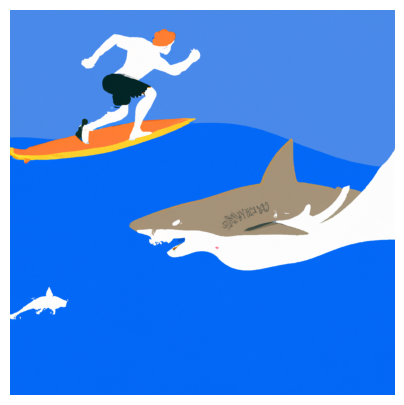

In [35]:
def call_dalle(prompt):
    filename =  'images/' + '_'.join(prompt.split(' ')).lower()

    config = {
        "api_key": OPENAI_API_KEY,
        "url": "https://api.openai.com/v1/images/generations",
        "filename" : filename,
        "headers": {
            "Content-Type": "application/json"
        },
        "payload": {
            "prompt": prompt,
            "n": 1,
            "size": "1024x1024",
            "response_format": "url",
            "user": "1234",
            "quality":"hd",
        }
    }

    # Suppress only the single InsecureRequestWarning from urllib3 needed for insecure HTTPS requests
    requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

    # Extract the API key and URL from the config
    api_key = config['api_key']
    url = config['url']

    # Update headers with the authorization token
    headers = config['headers']
    headers['Authorization'] = f"Bearer {api_key}"

    # Extract the payload from the config
    payload = config['payload']

    # Extract the desired filename from the config
    filename = config['filename']

    # Send a POST request to the OpenAI API
    response = requests.post(url, headers=headers, data=json.dumps(payload), verify=False)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the response JSON
        data = response.json()
        
        # Iterate over the generated images and save them
        for i, image_info in enumerate(data['data']):
            image_url = image_info['url']
            image_response = requests.get(image_url)
            
            if image_response.status_code == 200:
                # Save the image with the desired filename and index
                image_filename = f"{filename}{i+1}.png"
                with open(image_filename, 'wb') as img_file:
                    img_file.write(image_response.content)
                print(f"Image saved as {image_filename}")
                
                display_image(image_filename)
            else:
                print(f"Failed to download image {i+1}: {image_response.status_code} {image_response.content}")
    else:
        print(f"Failed to generate image: {response.status_code}")
        print(response.text)
        

prompt = "A realistic human surfing in a competition with a shark above him"
call_dalle(prompt)